Кошелев А

## Сбор и разметка данных (семинары).  
## Урок 9. Инструменты разметки наборов данных.  
### Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

### Источник датасета:

https://www.kaggle.com/datasets/coltonbarger/rotten-tomatoes-reviews-for-online-streaming-shows

## Описание датасета:  
Обзоры сайта-агрегатора рецензий Rotten Tomatoes на онлайн-трансляции шоу.

Это коллекция отзывов критиков и зрителей о 685 различных онлайн-трансляциях Rotten Tomatoes.  
Данные были собраны за неделю, начинающуюся 10 июля 2022 года.  
Отзывы, найденные в файлах, в большинстве случаев являются предварительными просмотрами, особенно если рецензия критика длинная.  
Также есть дубликаты некоторых отзывов в случае, если шоу можно найти более чем на одном онлайн-сервисе потоковой передачи (платном или с подпиской).

Были собраны данные по 100 самым популярным шоу с 9 стриминговых платформ:  
"Apple TV+", "Paramount+", "HBO MAX", "Disney+", "Prime Video", "Hulu", "Netflix", "Peacock" и "VUDU".  
Не у каждого  шоу, имеются с отзывы о  сервисе. На многие шоу просто не было отзывов ни критиков, ни зрителей. На некоторых сервисах также пока нет 100 шоу из-за того, что они более новые. Так обстоит дело, например, с Apple TV+.  
Кроме того, Rotten Tomatoes, по-видимому, часто выходит из строя из-за технического обслуживания. Это сильно повлияло на сбор отзывов, и нет уверенности, что все отзывы собраны..

Файл, содержащий отзывы критиков: __critic_reviews.csv__  
Столбцы:  
Show - это рецензируемое шоу,  
Sentiment - мнение критика (1 для положительного, 0 для отрицательного),  
Review - текст рецензии.  


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [4]:
reviews = pd.read_csv("critic_reviews.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
reviews.head()

,Show,Sentiment,Review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14791 entries, 0 to 14790
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       14791 non-null  object
 1   Sentiment  14791 non-null  int64 
 2   Review     14790 non-null  object
dtypes: int64(1), object(2)
memory usage: 346.8+ KB


<Axes: >

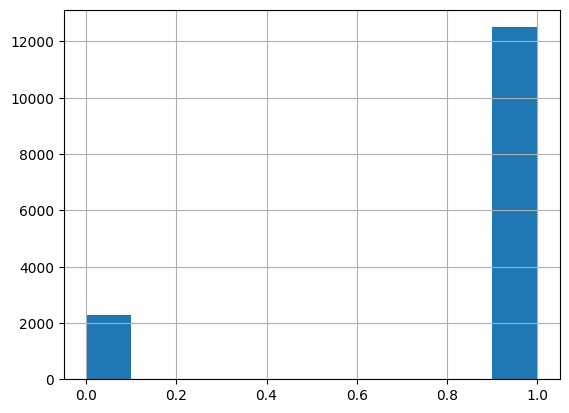

In [6]:
reviews['Sentiment'].hist()

### Задание 2.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета.  
Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [7]:
# размеченное и неразмеченное подмножества данных
reviews = shuffle(reviews)
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.5, random_state=42)
labeled_reviews

,Show,Sentiment,Review
2424,Frasier,1,It seems right that the series end on a high n...
2965,We Own This City,1,We Own This City is rooted in the energy and s...
4069,Watchmen,1,"This show transcends more than time, it transc..."
7924,Chloe,1,'Ingrid Goes West' meets 'The Girl on the Trai...
12625,The Queen's Gambit,1,The fact that you are constantly surprised by ...
...,...,...,...
3529,Peacemaker,1,About as much fun as you are going to have wat...
3084,The Staircase,1,While the episodes occasionally grind too slow...
11958,Midnight Mass,0,While some of the show's themes are talked to ...
14701,Trying,1,"The humor, warmth, and wit that made the serie..."


In [8]:
labeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 2424 to 13865
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [9]:
unlabeled_reviews.head()

,Show,Sentiment,Review
5663,Lovecraft Country,1,"With Lovecraft Country, HBO has found its next..."
6235,The Mandalorian,0,Any attempt to create new characters like Wern...
2952,We Own This City,1,Viewers who aren’t already familiar with the G...
207,Severance,1,"If Hell was a Staples breakroom, it's exactly ..."
6573,WandaVision,1,"As expected, the production values are excelle..."


In [10]:
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7396 entries, 5663 to 7753
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7396 non-null   object
 1   Sentiment  7396 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [11]:
# Обучение модели на размеченных данных
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['Review'])
    y = labeled_data['Sentiment']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [12]:
unlabeled_reviews = unlabeled_reviews.dropna()
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 5663 to 7753
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [13]:
x_unlabeled = vect.transform(unlabeled_reviews['Review'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [14]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)
print(uncertainty)

[0.20753983 0.82602298 0.4107245  ... 0.3593727  0.60448289 0.35854457]


In [15]:
# Выбираем 100 самых неопределенных точек данных, разметку которых нужно выполнить вручную
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]
labeled_reviews_new

,Show,Sentiment,Review
12391,Bridgerton,1,"Still beautiful, still fun and still excellent."
13050,The Crown,1,Sheesh. It's still a great watch.
12056,The Staircase,1,It makes for very powerful TV.
4797,Chernobyl,1,A riveting showcase for sheer storytelling cra...
9697,Only Murders in the Building,1,"Still fun, still the same."
...,...,...,...
13388,Dead End: Paranormal Park,1,Dead End: Paranormal Park is easily one of the...
14534,We Are Lady Parts,1,We Are Lady Parts is an assured mix of second-...
8431,Gaslit,1,"A perennially timely tale, and great TV."
8719,Invincible,1,I was impressed with how well it represents th...


### Задача 3.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [16]:
labeled_reviews_new.to_csv('temp.csv', index=False) # сохранение данных для ручной разметки

In [17]:
# загрузка данных после ручной разметки
labeled_reviews_new = pd.read_csv("temp.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
labeled_reviews_new

,Show,Sentiment,Review
0,Bridgerton,1,"Still beautiful, still fun and still excellent."
1,The Crown,1,Sheesh. It's still a great watch.
2,The Staircase,1,It makes for very powerful TV.
3,Chernobyl,1,A riveting showcase for sheer storytelling cra...
4,Only Murders in the Building,1,"Still fun, still the same."
...,...,...,...
95,Dead End: Paranormal Park,1,Dead End: Paranormal Park is easily one of the...
96,We Are Lady Parts,1,We Are Lady Parts is an assured mix of second-...
97,Gaslit,1,"A perennially timely tale, and great TV."
98,Invincible,1,I was impressed with how well it represents th...


### Задача 4.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [18]:
labeled_reviews_united = pd.concat([labeled_reviews, labeled_reviews_new])

In [19]:
labeled_reviews_united

,Show,Sentiment,Review
2424,Frasier,1,It seems right that the series end on a high n...
2965,We Own This City,1,We Own This City is rooted in the energy and s...
4069,Watchmen,1,"This show transcends more than time, it transc..."
7924,Chloe,1,'Ingrid Goes West' meets 'The Girl on the Trai...
12625,The Queen's Gambit,1,The fact that you are constantly surprised by ...
...,...,...,...
95,Dead End: Paranormal Park,1,Dead End: Paranormal Park is easily one of the...
96,We Are Lady Parts,1,We Are Lady Parts is an assured mix of second-...
97,Gaslit,1,"A perennially timely tale, and great TV."
98,Invincible,1,I was impressed with how well it represents th...


### Задача 5.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [20]:
model, vect = train_model(labeled_reviews_united)

In [21]:
reviews_test = unlabeled_reviews
reviews_test

,Show,Sentiment,Review
5663,Lovecraft Country,1,"With Lovecraft Country, HBO has found its next..."
6235,The Mandalorian,0,Any attempt to create new characters like Wern...
2952,We Own This City,1,Viewers who aren’t already familiar with the G...
207,Severance,1,"If Hell was a Staples breakroom, it's exactly ..."
6573,WandaVision,1,"As expected, the production values are excelle..."
...,...,...,...
6048,Scenes From a Marriage,1,"Levi's camera, as much as Bergman's, goes to t..."
3378,Station Eleven,1,Station Eleven is a slow burn. The first few e...
4380,Gentleman Jack,1,Gentleman Jack is disrupting the conventions o...
14477,Parenthood,1,The Bravermans left their mark on us in a way ...


In [22]:
x_test = vect.transform(reviews_test['Review'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1])

### Задача 6.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки.  
Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [23]:
f1 = f1_score(reviews_test['Sentiment'], y_test_predicted)
f1

0.9204720369420215